# Table Of Content
<ul>
<li><a href="#Introduction">Introduction</a></li>
<li><a href="#Gathering">Gathering data</a></li>
<li><a href="#Assessing">Assessing data</a></li>
<li><a href="#Cleaning">Cleaning data</a></li>
<li><a href="#Storing">Storing data</a></li>
<li><a href="#AandV">Analyzing, and visualizing data</a></li>
</ul>

### Introduction
<a id='Introduction'></a>

The objective of this project is to put in practice what I learned in data wrangling data section 
from Udacity Data Analysis Nanodegree program. 
I will use WeRateDogs dataset from user @dog_rates archive in tweeter.

### Gathering data
<a id='Gathering'></a>


##### Download and upload 'twitter-archive-enhanced.csv' and read it into pandas dataframe

In [1]:
#import all necessary libraries
import pandas as pd
import numpy as np
import requests
import tweepy 
import json
import datetime
from tweepy import OAuthHandler
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading csv file 
tweeter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')
tweeter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
tweeter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

##### Download 'image_predictions.tsv' from the using the Request library

In [4]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image_prediction.tsv', mode='wb') as file:
    file.write(response.content)
#readimg tsv fila with csv method
image_df = pd.read_csv('image_prediction.tsv', sep='\t')

In [5]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


##### quering each tweet's retweet count and favorite using the Tweepy library and stored the data in tweet

In [6]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [7]:
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = tweeter_archive_df.tweet_id.values
len(tweet_ids)

2356

In [11]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet-json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
#end = timer()
#print(end - start)
#print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
289: 838476387338051585
Fail
290: 838201503651401729
Fail
291: 838150277551247360
Fail
292: 838085839343206401
Fail
293: 838083903487373313
Fail
294: 837820167694528512
Fail
295: 837482249356513284
Fail
296: 837471256429613056
Fail
297: 837366284874571778
Fail
298: 837110210464448512
Fail
299: 837012587749474308
Fail
300: 836989968035819520
Fail
301: 836753516572119041
Fail
302: 836677758902222849
Fail
303: 836648853927522308
Fail
304: 836397794269200385
Fail
305: 836380477523124226
Fail
306: 836260088725786625
Fail
307: 836001077879255040
Fail
308: 835685285446955009
Fail
309: 835574547218894849
Fail
310: 835536468978302976
Fail
311: 835309094223372289
Fail
312: 835297930240217089
Fail
313: 835264098648616962
Fail
314: 835246439529840640
Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 834209720923721728
Fail
323: 8341

Fail
572: 801538201127157760
Fail
573: 801285448605831168
Fail
574: 801167903437357056
Fail
575: 801127390143516673
Fail
576: 801115127852503040
Fail
577: 800859414831898624
Fail
578: 800855607700029440
Fail
579: 800751577355128832
Fail
580: 800513324630806528
Fail
581: 800459316964663297
Fail
582: 800443802682937345
Fail
583: 800388270626521089
Fail
584: 800188575492947969
Fail
585: 800141422401830912
Fail
586: 800018252395122689
Fail
587: 799774291445383169
Fail
588: 799757965289017345
Fail
589: 799422933579902976
Fail
590: 799308762079035393
Fail
591: 799297110730567681
Fail
592: 799063482566066176
Fail
593: 798933969379225600
Fail
594: 798925684722855936
Fail
595: 798705661114773508
Fail
596: 798701998996647937
Fail
597: 798697898615730177
Fail
598: 798694562394996736
Fail
599: 798686750113755136
Fail
600: 798682547630837760
Fail
601: 798673117451325440
Fail
602: 798665375516884993
Fail
603: 798644042770751489
Fail
604: 798628517273620480
Fail
605: 798585098161549313
Fail
606: 7985

Fail
855: 765222098633691136
Fail
856: 764857477905154048
Fail
857: 764259802650378240
Fail
858: 763956972077010945
Fail
859: 763837565564780549
Fail
860: 763183847194451968
Fail
861: 763167063695355904
Fail
862: 763103485927849985
Fail
863: 762699858130116608
Fail
864: 762471784394268675
Fail
865: 762464539388485633
Fail
866: 762316489655476224
Fail
867: 762035686371364864
Fail
868: 761976711479193600
Fail
869: 761750502866649088
Fail
870: 761745352076779520
Fail
871: 761672994376806400
Fail
872: 761599872357261312
Fail
873: 761371037149827077
Fail
874: 761334018830917632
Fail
875: 761292947749015552
Fail
876: 761227390836215808
Fail
877: 761004547850530816
Fail
878: 760893934457552897
Fail
879: 760656994973933572
Fail
880: 760641137271070720
Fail
881: 760539183865880579
Fail
882: 760521673607086080
Fail
883: 760290219849637889
Fail
884: 760252756032651264
Fail
885: 760190180481531904
Fail
886: 760153949710192640
Fail
887: 759943073749200896
Fail
888: 759923798737051648
Fail
889: 7598

Fail
1134: 728751179681943552
Fail
1135: 728653952833728512
Fail
1136: 728409960103686147
Fail
1137: 728387165835677696
Fail
1138: 728046963732717569
Fail
1139: 728035342121635841
Fail
1140: 728015554473250816
Fail
1141: 727685679342333952
Fail
1142: 727644517743104000
Fail
1143: 727524757080539137
Fail
1144: 727314416056803329
Fail
1145: 727286334147182592
Fail
1146: 727175381690781696
Fail
1147: 727155742655025152
Fail
1148: 726935089318363137
Fail
1149: 726887082820554753
Fail
1150: 726828223124897792
Fail
1151: 726224900189511680
Fail
1152: 725842289046749185
Fail
1153: 725786712245440512
Fail
1154: 725729321944506368
Fail
1155: 725458796924002305
Fail
1156: 724983749226668032
Fail
1157: 724771698126512129
Fail
1158: 724405726123311104
Fail
1159: 724049859469295616
Fail
1160: 724046343203856385
Fail
1161: 724004602748780546
Fail
1162: 723912936180330496
Fail
1163: 723688335806480385
Fail
1164: 723673163800948736
Fail
1165: 723179728551723008
Fail
1166: 722974582966214656
Fail
1167:

Fail
1409: 699072405256409088
Fail
1410: 699060279947165696
Fail
1411: 699036661657767936
Fail
1412: 698989035503689728
Fail
1413: 698953797952008193
Fail
1414: 698907974262222848
Fail
1415: 698710712454139905
Fail
1416: 698703483621523456
Fail
1417: 698635131305795584
Fail
1418: 698549713696649216
Fail
1419: 698355670425473025
Fail
1420: 698342080612007937
Fail
1421: 698262614669991936
Fail
1422: 698195409219559425
Fail
1423: 698178924120031232
Fail
1424: 697995514407682048
Fail
1425: 697990423684476929
Fail
1426: 697943111201378304
Fail
1427: 697881462549430272
Fail
1428: 697630435728322560
Fail
1429: 697616773278015490
Fail
1430: 697596423848730625
Fail
1431: 697575480820686848
Fail
1432: 697516214579523584
Fail
1433: 697482927769255936
Fail
1434: 697463031882764288
Fail
1435: 697270446429966336
Fail
1436: 697259378236399616
Fail
1437: 697255105972801536
Fail
1438: 697242256848379904
Fail
1439: 696900204696625153
Fail
1440: 696894894812565505
Fail
1441: 696886256886657024
Fail
1442:

Fail
1684: 681694085539872773
Fail
1685: 681679526984871937
Fail
1686: 681654059175129088
Fail
1687: 681610798867845120
Fail
1688: 681579835668455424
Fail
1689: 681523177663676416
Fail
1690: 681340665377193984
Fail
1691: 681339448655802368
Fail
1692: 681320187870711809
Fail
1693: 681302363064414209
Fail
1694: 681297372102656000
Fail
1695: 681281657291280384
Fail
1696: 681261549936340994
Fail
1697: 681242418453299201
Fail
1698: 681231109724700672
Fail
1699: 681193455364796417
Fail
1700: 680970795137544192
Fail
1701: 680959110691590145
Fail
1702: 680940246314430465
Fail
1703: 680934982542561280
Fail
1704: 680913438424612864
Fail
1705: 680889648562991104
Fail
1706: 680836378243002368
Fail
1707: 680805554198020098
Fail
1708: 680801747103793152
Fail
1709: 680798457301471234
Fail
1710: 680609293079592961
Fail
1711: 680583894916304897
Fail
1712: 680497766108381184
Fail
1713: 680494726643068929
Fail
1714: 680473011644985345
Fail
1715: 680440374763077632
Fail
1716: 680221482581123072
Fail
1717:

Fail
1959: 673580926094458881
Fail
1960: 673576835670777856
Fail
1961: 673363615379013632
Fail
1962: 673359818736984064
Fail
1963: 673355879178194945
Fail
1964: 673352124999274496
Fail
1965: 673350198937153538
Fail
1966: 673345638550134785
Fail
1967: 673343217010679808
Fail
1968: 673342308415348736
Fail
1969: 673320132811366400
Fail
1970: 673317986296586240
Fail
1971: 673295268553605120
Fail
1972: 673270968295534593
Fail
1973: 673240798075449344
Fail
1974: 673213039743795200
Fail
1975: 673148804208660480
Fail
1976: 672997845381865473
Fail
1977: 672995267319328768
Fail
1978: 672988786805112832
Fail
1979: 672984142909456390
Fail
1980: 672980819271634944
Fail
1981: 672975131468300288
Fail
1982: 672970152493887488
Fail
1983: 672968025906282496
Fail
1984: 672964561327235073
Fail
1985: 672902681409806336
Fail
1986: 672898206762672129
Fail
1987: 672884426393653248
Fail
1988: 672877615439593473
Fail
1989: 672834301050937345
Fail
1990: 672828477930868736
Fail
1991: 672640509974827008
Fail
1992:

Fail
2233: 668221241640230912
Fail
2234: 668204964695683073
Fail
2235: 668190681446379520
Fail
2236: 668171859951755264
Fail
2237: 668154635664932864
Fail
2238: 668142349051129856
Fail
2239: 668113020489474048
Fail
2240: 667937095915278337
Fail
2241: 667924896115245057
Fail
2242: 667915453470232577
Fail
2243: 667911425562669056
Fail
2244: 667902449697558528
Fail
2245: 667886921285246976
Fail
2246: 667885044254572545
Fail
2247: 667878741721415682
Fail
2248: 667873844930215936
Fail
2249: 667866724293877760
Fail
2250: 667861340749471744
Fail
2251: 667832474953625600
Fail
2252: 667806454573760512
Fail
2253: 667801013445750784
Fail
2254: 667793409583771648
Fail
2255: 667782464991965184
Fail
2256: 667773195014021121
Fail
2257: 667766675769573376
Fail
2258: 667728196545200128
Fail
2259: 667724302356258817
Fail
2260: 667550904950915073
Fail
2261: 667550882905632768
Fail
2262: 667549055577362432
Fail
2263: 667546741521195010
Fail
2264: 667544320556335104
Fail
2265: 667538891197542400
Fail
2266:

##### Read the tweet_json.txt line by line into a pandas DataFrame

In [8]:
tweet_list = []

with open('tweet-json.txt', 'r', encoding='utf8') as json_file:
    for line in json_file:
        lines = json.loads(line)#source
        tweet_list.append({'tweet_id': lines['id'],
                        'favorite_count': lines['favorite_count'],
                        'retweet_count': lines['retweet_count'],
                        'timestamp': lines['created_at'],
                        'source': lines['source']})
tweet_json_df = pd.DataFrame(tweet_list, columns=['tweet_id','favorite_count','retweet_count','timestamp','source'])

In [9]:
tweet_json_df.head()

,tweet_id,favorite_count,retweet_count,timestamp,source
0,892420643555336193,39467,8853,Tue Aug 01 16:23:56 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r..."
1,892177421306343426,33819,6514,Tue Aug 01 00:17:27 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r..."
2,891815181378084864,25461,4328,Mon Jul 31 00:18:03 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r..."
3,891689557279858688,42908,8964,Sun Jul 30 15:58:51 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r..."
4,891327558926688256,41048,9774,Sat Jul 29 16:00:24 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r..."


##### Visual & Programmatic Assessment

### Assessing Data
<a id='Assessing'></a>

tweeter_archive_df

In [10]:
tweeter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
tweeter_archive_df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [12]:
tweeter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
tweeter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
tweeter_archive_df[tweeter_archive_df.name == "a" ].count()

tweet_id                      55
in_reply_to_status_id          0
in_reply_to_user_id            0
timestamp                     55
source                        55
text                          55
retweeted_status_id            0
retweeted_status_user_id       0
retweeted_status_timestamp     0
expanded_urls                 55
rating_numerator              55
rating_denominator            55
name                          55
doggo                         55
floofer                       55
pupper                        55
puppo                         55
dtype: int64

In [15]:
tweeter_archive_df[tweeter_archive_df.name == "an" ].count()

tweet_id                      7
in_reply_to_status_id         0
in_reply_to_user_id           0
timestamp                     7
source                        7
text                          7
retweeted_status_id           1
retweeted_status_user_id      1
retweeted_status_timestamp    1
expanded_urls                 7
rating_numerator              7
rating_denominator            7
name                          7
doggo                         7
floofer                       7
pupper                        7
puppo                         7
dtype: int64

In [16]:
tweeter_archive_df[tweeter_archive_df.name == "None" ].count()

tweet_id                      745
in_reply_to_status_id          77
in_reply_to_user_id            77
timestamp                     745
source                        745
text                          745
retweeted_status_id            65
retweeted_status_user_id       65
retweeted_status_timestamp     65
expanded_urls                 686
rating_numerator              745
rating_denominator            745
name                          745
doggo                         745
floofer                       745
pupper                        745
puppo                         745
dtype: int64

In [17]:
tweeter_archive_df[tweeter_archive_df.name == "the" ].count()

tweet_id                      8
in_reply_to_status_id         0
in_reply_to_user_id           0
timestamp                     8
source                        8
text                          8
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
expanded_urls                 8
rating_numerator              8
rating_denominator            8
name                          8
doggo                         8
floofer                       8
pupper                        8
puppo                         8
dtype: int64

In [18]:
tweeter_archive_df.loc[tweeter_archive_df.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [19]:
tweeter_archive_df.retweeted_status_id.notna().sum()

181

In [20]:
tweeter_archive_df.retweeted_status_user_id.notna().sum()

181

In [21]:
tweeter_archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [22]:
tweeter_archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

image_df

In [23]:
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [24]:
image_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [25]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
image_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [27]:
image_df.sample(8)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1084,718540630683709445,https://pbs.twimg.com/media/CfjE5FRXEAErFWR.jpg,2,Maltese_dog,0.632289,True,West_Highland_white_terrier,0.187055,True,cairn,0.044413,True
1586,797971864723324932,https://pbs.twimg.com/media/CxL3IWeVEAAAIE2.jpg,1,American_Staffordshire_terrier,0.489845,True,Chihuahua,0.305760,True,Staffordshire_bullterrier,0.072799,True
518,676470639084101634,https://pbs.twimg.com/media/CWNOdIpWoAAWid2.jpg,1,golden_retriever,0.790386,True,borzoi,0.022885,True,dingo,0.015343,False
1602,800018252395122689,https://pbs.twimg.com/ext_tw_video_thumb/80001...,1,vacuum,0.289485,False,punching_bag,0.243297,False,barbell,0.143630,False
447,674670581682434048,https://pbs.twimg.com/media/CVzpUGUWUAAo7Vn.jpg,1,malamute,0.180079,True,Eskimo_dog,0.178033,True,Siberian_husky,0.077966,True
2039,884925521741709313,https://pbs.twimg.com/media/DEfjEaNXkAAtPlj.jpg,1,Italian_greyhound,0.259916,True,American_Staffordshire_terrier,0.198451,True,Staffordshire_bullterrier,0.127725,True
1685,814530161257443328,https://pbs.twimg.com/media/C03K2-VWIAAK1iV.jpg,1,miniature_poodle,0.626913,True,toy_poodle,0.265582,True,soft-coated_wheaten_terrier,0.041614,True
1177,737800304142471168,https://pbs.twimg.com/media/Cj0xdMBVAAEbDHp.jpg,1,malamute,0.374682,True,Norwegian_elkhound,0.334853,True,limousine,0.068173,False


In [28]:
image_df[image_df.jpg_url.duplicated()].count()

tweet_id    66
jpg_url     66
img_num     66
p1          66
p1_conf     66
p1_dog      66
p2          66
p2_conf     66
p2_dog      66
p3          66
p3_conf     66
p3_dog      66
dtype: int64

tweet_json_df

In [29]:
tweet_json_df.head()

,tweet_id,favorite_count,retweet_count,timestamp,source
0,892420643555336193,39467,8853,Tue Aug 01 16:23:56 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r..."
1,892177421306343426,33819,6514,Tue Aug 01 00:17:27 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r..."
2,891815181378084864,25461,4328,Mon Jul 31 00:18:03 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r..."
3,891689557279858688,42908,8964,Sun Jul 30 15:58:51 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r..."
4,891327558926688256,41048,9774,Sat Jul 29 16:00:24 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r..."


In [30]:
tweet_json_df.tail()

,tweet_id,favorite_count,retweet_count,timestamp,source
2349,666049248165822465,111,41,Mon Nov 16 00:24:50 +0000 2015,"<a href=""http://twitter.com/download/iphone"" r..."
2350,666044226329800704,311,147,Mon Nov 16 00:04:52 +0000 2015,"<a href=""http://twitter.com/download/iphone"" r..."
2351,666033412701032449,128,47,Sun Nov 15 23:21:54 +0000 2015,"<a href=""http://twitter.com/download/iphone"" r..."
2352,666029285002620928,132,48,Sun Nov 15 23:05:30 +0000 2015,"<a href=""http://twitter.com/download/iphone"" r..."
2353,666020888022790149,2535,532,Sun Nov 15 22:32:08 +0000 2015,"<a href=""http://twitter.com/download/iphone"" r..."


In [31]:
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
timestamp         2354 non-null object
source            2354 non-null object
dtypes: int64(3), object(2)
memory usage: 92.0+ KB


In [32]:
tweet_json_df.describe()

,tweet_id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [33]:
tweet_json_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2219
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

#### Quality issues.

##### Tweeter_Archive_df
- There are invalid dog names like None, a, an and the.
- There is multiple missing values in expanded_urls column
- There are unnecessary columns must be delete.
- There are 181 retweeted by retweeted_status_id and retweeted_status_user_id.
- Some of the denominator in rating_denominator column are not 10.  
    reasons: I found some of the posted image contains more than one dog, 
    so we will rate 5 dogs based on a denominator of 50 and so on.
- Some of the numerators in rating_numerator column are very large and some of this numerators should be in decimals

##### Image_Predictions
- Some names in P start with an uppercase letter and some of them start with lowercase.
- There are 66 row jpg_url duplicated

##### Tweet_Jason
- Invalid timestamp data type (must be datetime).

##### Tidiness issues.

1- The 3 tables are related but they appear individually

2- The doggo , floofer, pupper and puppo columns are appear individually

### Cleaning Data
<a id='Cleaning'></a>

a copy of original data before cleaning

In [34]:
clean_tweeter_archive = tweeter_archive_df.copy()
clean_image = image_df.copy()
clean_tweet_json = tweet_json_df.copy()

##### Tweeter_Archive_df

##### Define
remove invalid dog names like None, a, an and the

##### Code

In [39]:
invalid_dog_name = clean_tweeter_archive.loc[(clean_tweeter_archive.name.str.islower())].name.value_counts().index.tolist()
invalid_dog_name.append('None')
invalid_dog_name

['a',
 'the',
 'an',
 'very',
 'just',
 'quite',
 'one',
 'getting',
 'mad',
 'not',
 'actually',
 'such',
 'light',
 'my',
 'space',
 'all',
 'unacceptable',
 'his',
 'this',
 'by',
 'life',
 'old',
 'incredibly',
 'officially',
 'infuriating',
 'None']

In [40]:
for name in invalid_dog_name:
    clean_tweeter_archive.loc[clean_tweeter_archive.name == name, 'name'] = None

##### Test

In [41]:
clean_tweeter_archive.name.value_counts()

Charlie      12
Cooper       11
Lucy         11
Oliver       11
Lola         10
Tucker       10
Penny        10
Bo            9
Winston       9
Sadie         8
Daisy         7
Buddy         7
Bailey        7
Toby          7
Dave          6
Stanley       6
Koda          6
Jack          6
Leo           6
Jax           6
Scout         6
Bella         6
Oscar         6
Rusty         6
Milo          6
Phil          5
Alfie         5
Finn          5
Larry         5
Gus           5
             ..
Kaiya         1
Stuart        1
Teddy         1
Rumpole       1
Randall       1
Einstein      1
Sprout        1
Gustaf        1
Ralphson      1
Todo          1
Shiloh        1
Kramer        1
Taco          1
Fynn          1
Naphaniel     1
Kathmandu     1
Iggy          1
Luther        1
Amber         1
Pancake       1
Bodie         1
Ashleigh      1
Beya          1
Pilot         1
Birf          1
Striker       1
Fiji          1
Linus         1
Gilbert       1
Kaia          1
Name: name, Length: 931,

##### Define
Drop missing values in expanded_urls column

##### Code


In [42]:
clean_tweeter_archive.dropna(subset=['expanded_urls'], inplace=True) 

##### Test


In [43]:
clean_tweeter_archive.expanded_urls.isnull().sum()

0

##### Define 
Remove 181 retweeted by retweeted_status_id

##### Code

In [44]:
clean_tweeter_archive = clean_tweeter_archive[clean_tweeter_archive.retweeted_status_id.isnull()]

##### Test

In [45]:
clean_tweeter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2117 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null object
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          1391 non-null object
doggo                         2117 non-null object
floofer                       2117 non-null object
pupper                        2117 non-null object
puppo                         2117 non-null object
dtypes: float64(4), int64(3), object(1

##### Define
set the doggo, floofer, pupper and puppo columns in one column

##### Code

In [46]:
clean_tweeter_archive.doggo.replace('None', '', inplace=True)
clean_tweeter_archive.doggo.replace(np.NaN, '', inplace=True)
clean_tweeter_archive.floofer.replace('None', '', inplace=True)
clean_tweeter_archive.floofer.replace(np.NaN, '', inplace=True)
clean_tweeter_archive.pupper.replace('None', '', inplace=True)
clean_tweeter_archive.pupper.replace(np.NaN, '', inplace=True)
clean_tweeter_archive.puppo.replace('None', '', inplace=True)
clean_tweeter_archive.puppo.replace(np.NaN, '', inplace=True)

In [47]:
clean_tweeter_archive['dog_stage'] = clean_tweeter_archive.text.str.extract('(doggo|floofer|pupper|puppo)', expand = True)

In [48]:
clean_tweeter_archive['dog_stage'] = clean_tweeter_archive.doggo + clean_tweeter_archive.floofer + clean_tweeter_archive.pupper + clean_tweeter_archive.puppo
clean_tweeter_archive.loc[clean_tweeter_archive.dog_stage == 'doggo&floofer', 'dog_stage'] = 'doggo, floofer'
clean_tweeter_archive.loc[clean_tweeter_archive.dog_stage == 'doggo&puppo', 'dog_stage'] = 'doggo, puppo'
clean_tweeter_archive.loc[clean_tweeter_archive.dog_stage == 'doggo&pupper', 'dog_stage'] = 'doggo, pupper'

In [49]:
clean_tweeter_archive.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace = True)

##### Test

In [50]:
clean_tweeter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2117 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null object
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          1391 non-null object
dog_stage                     2117 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 248.1+ KB


##### Test


In [51]:
clean_tweeter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2117 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null object
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          1391 non-null object
dog_stage                     2117 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 248.1+ KB


##### Image_Predictions

##### Define 
convert names in P column to lowercase

##### Code

In [52]:
clean_image.p1 = clean_image.p1.str.lower()
clean_image.p2 = clean_image.p2.str.lower()
clean_image.p3 = clean_image.p3.str.lower()

##### Test

In [53]:
clean_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


#### Define
Drop duplicated rows in jpg_url

##### Code

In [54]:
clean_image = clean_image.drop_duplicates(subset=['jpg_url'], keep='last')

##### Test


In [55]:
sum(clean_image.jpg_url.duplicated())

0

##### Define
Merg all datasets in one dataset

#### Code 

In [73]:
twitAndimg_df = pd.merge(clean_tweeter_archive,clean_image,how = 'left', on = ['tweet_id'])
#keep rows with picture in jpg_url column
twitAndimg_df = twitAndimg_df[twitAndimg_df['jpg_url'].notnull()]
twitter_df = pd.merge(twitAndimg_df, clean_tweet_json,how = 'left', on = ['tweet_id'])

#### Test 1

In [74]:
twitAndimg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 0 to 2116
Data columns (total 25 columns):
tweet_id                      1928 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1928 non-null object
source                        1928 non-null object
text                          1928 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1928 non-null object
rating_numerator              1928 non-null int64
rating_denominator            1928 non-null int64
name                          1303 non-null object
dog_stage                     1928 non-null object
jpg_url                       1928 non-null object
img_num                       1928 non-null float64
p1                            1928 non-null object
p1_conf                       1928 no

#### Test 2 

In [75]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 0 to 1927
Data columns (total 29 columns):
tweet_id                      1928 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp_x                   1928 non-null object
source_x                      1928 non-null object
text                          1928 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1928 non-null object
rating_numerator              1928 non-null int64
rating_denominator            1928 non-null int64
name                          1303 non-null object
dog_stage                     1928 non-null object
jpg_url                       1928 non-null object
img_num                       1928 non-null float64
p1                            1928 non-null object
p1_conf                       1928 no

##### Define 
rename some columns and change invalid timestamp data type in clean_tweeter_archive

##### Code

In [76]:
twitter_df.rename(columns={'source_x': 'source'}, inplace=True)

In [77]:
twitter_df.rename(columns={'timestamp_x': 'timestamp'}, inplace=True)

In [78]:
twitter_df.timestamp = pd.to_datetime(twitter_df.timestamp) 

##### Test

In [79]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 0 to 1927
Data columns (total 29 columns):
tweet_id                      1928 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1928 non-null datetime64[ns]
source                        1928 non-null object
text                          1928 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1928 non-null object
rating_numerator              1928 non-null int64
rating_denominator            1928 non-null int64
name                          1303 non-null object
dog_stage                     1928 non-null object
jpg_url                       1928 non-null object
img_num                       1928 non-null float64
p1                            1928 non-null object
p1_conf                      

##### Define
I will save a rating_numerator /rating_denominator in new column rating

In [80]:
rateing = twitter_df.rating_numerator / twitter_df.rating_denominator *10
twitter_df['rateing'] = rateing

##### Test

In [81]:
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,timestamp_y,source_y,rateing
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.085851,False,banana,0.076110,False,39467,8853,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",13.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.090647,True,papillon,0.068957,True,33819,6514,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",13.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.078253,True,kelpie,0.031379,True,25461,4328,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",12.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.168086,True,spatula,0.040836,False,42908,8964,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",13.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.225770,True,german_short-haired_pointer,0.175219,True,41048,9774,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",12.0


##### Define
Drop unnecessary columns 

##### Code


In [82]:
twitter_df = twitter_df.drop(['in_reply_to_status_id','rating_denominator','rating_numerator','source_y',
                                                    'in_reply_to_user_id','retweeted_status_id',
                                                    'retweeted_status_user_id','retweeted_status_timestamp', 
                                                    'expanded_urls','timestamp_y','img_num','p1_conf', 
                                                    'p1_dog','p2_conf','p2_dog', 'p3_conf','p3_dog'], 1) 

##### Test

In [83]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 0 to 1927
Data columns (total 13 columns):
tweet_id          1928 non-null int64
timestamp         1928 non-null datetime64[ns]
source            1928 non-null object
text              1928 non-null object
name              1303 non-null object
dog_stage         1928 non-null object
jpg_url           1928 non-null object
p1                1928 non-null object
p2                1928 non-null object
p3                1928 non-null object
favorite_count    1928 non-null int64
retweet_count     1928 non-null int64
rateing           1928 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3), object(8)
memory usage: 210.9+ KB


### Storing Data
<a id='Storing'></a>

###### I have saved the gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv"

In [84]:
##twitter_archive_master.csv
twitter_df.to_csv('twitter_archive_master.csv',index=False, encoding = 'utf-8')

### Analyzing and Visualizing Data
<a id='AandV'></a>

In [85]:
#loading data 
df = pd.read_csv('twitter_archive_master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1928 entries, 0 to 1927
Data columns (total 13 columns):
tweet_id          1928 non-null int64
timestamp         1928 non-null object
source            1928 non-null object
text              1928 non-null object
name              1303 non-null object
dog_stage         295 non-null object
jpg_url           1928 non-null object
p1                1928 non-null object
p2                1928 non-null object
p3                1928 non-null object
favorite_count    1928 non-null int64
retweet_count     1928 non-null int64
rateing           1928 non-null float64
dtypes: float64(1), int64(3), object(9)
memory usage: 195.9+ KB


##### #1 the most  dog name in this dataset.

In [86]:
df.name.value_counts()

Charlie         11
Oliver          10
Lucy            10
Cooper          10
Winston          8
Penny            8
Tucker           8
Sadie            8
Toby             7
Daisy            7
Lola             6
Bella            6
Jax              6
Stanley          6
Koda             6
Louis            5
Oscar            5
Leo              5
Chester          5
Buddy            5
Bo               4
Sophie           4
Dexter           4
Duke             4
Milo             4
Bentley          4
Finn             4
Archie           4
George           4
Oakley           4
                ..
Durg             1
Coleman          1
Bobb             1
Kody             1
Tupawc           1
Jiminus          1
Cannon           1
Monster          1
Heinrich         1
Beemo            1
Iroh             1
Dewey            1
Anthony          1
Kingsley         1
Tassy            1
Alexanderson     1
Shawwn           1
Aubie            1
Napolean         1
Godi             1
Strider          1
Spark       

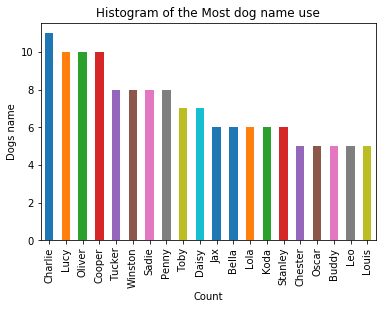

In [87]:
dog_name_df = df.groupby('name').filter(lambda x: len(x) >= 5)
dog_name_df['name'].value_counts().plot(kind = 'bar')
plt.title('Histogram of the Most dog name use')
plt.xlabel('Count')
plt.ylabel('Dogs name');

from the above Histogram its seem charlie is the most name used

#### #2The percentage of the dog stages

In [53]:
dog_stage_df = df.dog_stage.value_counts()
dog_stage_df

pupper          199
doggo            59
puppo            21
floofer           7
doggopupper       7
doggofloofer      1
doggopuppo        1
Name: dog_stage, dtype: int64

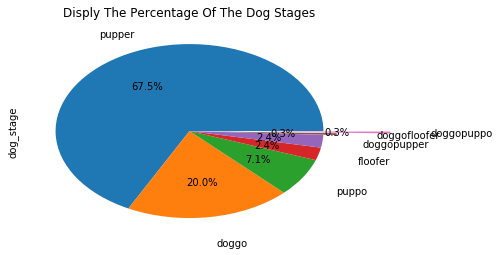

In [54]:
labels = ['Pupper', 'Doggo', 'Puppo','Floofer','DoggoPupper','DoggoFloofer','DoggoPuppo']
dog_stage_df.plot.pie(labeldistance = 1.3,
         autopct = '%1.1f%%',center=(9, 3),
    explode = (0.0,0.0,0.0,0.0,0.,0.1,0.5)
)
plt.title('Disply The Percentage Of The Dog Stages');

##### #3The Popular types of dogs that people favorit

In [55]:
fev_type = df.groupby('p1')['favorite_count'].sum().sort_values(ascending=False).head(6)

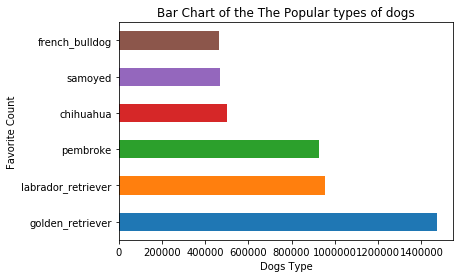

In [56]:
fev_type.plot(x='retweet_count', y='favorite_count', kind='barh')
plt.xlabel('Dogs Type')
plt.ylabel('Favorite Count')
plt.title('Bar Chart of the The Popular types of dogs');

golden_retriever is the ppopular type

##### #4The relationship between favorite count dand retweet count.

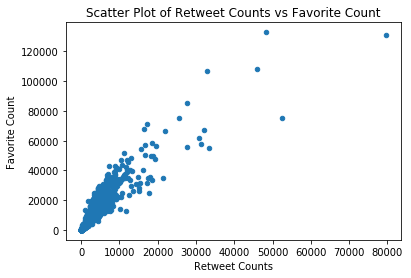

In [57]:
df.plot(x='retweet_count', y='favorite_count', kind='scatter')
plt.xlabel('Retweet Counts')
plt.ylabel('Favorite Count')
plt.title('Scatter Plot of Retweet Counts vs Favorite Count');

The relationship between favorite count and retweet count is Positive relationship because they are increase together